In [3]:
!wget --no-check-certificate \
  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \ -O cats_and_dogs_filtered.zip

--2019-10-10 09:03:37--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Loaded CA certificate '/etc/ssl/certs/ca-certificates.crt'
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.24.128, 2404:6800:4003:c03::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.24.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M  2.28MB/s    in 29s     

2019-10-10 09:04:06 (2.28 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]

--2019-10-10 09:04:06--  http://%20-o/
Resolving  -o ( -o)... failed: Name or service not known.
wget: unable to resolve host address ‘ -o’
--2019-10-10 09:04:06--  http://cats_and_dogs_filtered.zip/
Resolving cats_and_dogs_filtered.zip (cats_and_dogs_filtered.zip)... failed: Name or service not known.
wget: unable to resolve host address ‘cats_an

In [4]:
import os
import zipfile

zip_ref = zipfile.ZipFile('cats_and_dogs_filtered.zip', 'r')

zip_ref.extractall()
zip_ref.close()

In [5]:
base_dir = 'cats_and_dogs_filtered'

train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir,'validation')

train_cats_dir = os.path.join(train_dir,'cats')
train_dogs_dir = os.path.join(train_dir,'dogs')

validation_cats_dir = os.path.join(validation_dir,'cats')
validation_dogs_dir = os.path.join(validation_dir,'dogs')

In [6]:
train_cat_fnames = os.listdir(train_cats_dir)
train_dog_fnames = os.listdir(train_dogs_dir)

print(train_cat_fnames[:10])
print(train_dog_fnames[:10])

['cat.875.jpg', 'cat.538.jpg', 'cat.784.jpg', 'cat.162.jpg', 'cat.878.jpg', 'cat.467.jpg', 'cat.532.jpg', 'cat.420.jpg', 'cat.436.jpg', 'cat.94.jpg']
['dog.296.jpg', 'dog.849.jpg', 'dog.557.jpg', 'dog.167.jpg', 'dog.313.jpg', 'dog.612.jpg', 'dog.758.jpg', 'dog.380.jpg', 'dog.650.jpg', 'dog.201.jpg']


In [7]:
print('total training cat images :', len(os.listdir(      train_cats_dir ) ))
print('total training dog images :', len(os.listdir(      train_dogs_dir ) ))

print('total validation cat images :', len(os.listdir( validation_cats_dir ) ))
print('total validation dog images :', len(os.listdir( validation_dogs_dir ) ))

total training cat images : 1001
total training dog images : 1000
total validation cat images : 500
total validation dog images : 500


In [8]:
import tensorflow as tf

/usr/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of 

In [31]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(300,300,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
#     tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
#     tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
    
])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 35, 35, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 78400)            

In [32]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=.001),loss='binary_crossentropy',metrics = ['acc'])

In [33]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255.)
test_datagen = ImageDataGenerator(rescale=1./255.)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    batch_size = 20,
    class_mode = 'binary',
    target_size = (300,300)
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    batch_size = 20,
    class_mode = 'binary',
    target_size = (300,300)
)

Found 2002 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [34]:
history = model.fit_generator(
    train_generator,
    validation_data = validation_generator,
    steps_per_epoch = 100,
    epochs = 15,
    validation_steps = 50,
    verbose = 2
)

Epoch 1/15
100/100 - 11s - loss: 1.2641 - acc: 0.5469 - val_loss: 0.6801 - val_acc: 0.6390
Epoch 2/15
100/100 - 10s - loss: 0.6640 - acc: 0.6524 - val_loss: 0.6313 - val_acc: 0.6380
Epoch 3/15
100/100 - 10s - loss: 0.5802 - acc: 0.7346 - val_loss: 0.6441 - val_acc: 0.6750
Epoch 4/15
100/100 - 10s - loss: 0.4827 - acc: 0.8219 - val_loss: 0.6736 - val_acc: 0.6880
Epoch 5/15
100/100 - 10s - loss: 0.3049 - acc: 0.8890 - val_loss: 1.0348 - val_acc: 0.5710
Epoch 6/15
100/100 - 9s - loss: 0.1945 - acc: 0.9218 - val_loss: 1.0209 - val_acc: 0.6750
Epoch 7/15
100/100 - 10s - loss: 0.1432 - acc: 0.9535 - val_loss: 1.6917 - val_acc: 0.6870
Epoch 8/15
100/100 - 10s - loss: 0.1154 - acc: 0.9730 - val_loss: 2.1936 - val_acc: 0.6430
Epoch 9/15
100/100 - 9s - loss: 0.1978 - acc: 0.9813 - val_loss: 2.1950 - val_acc: 0.6730
Epoch 10/15
100/100 - 10s - loss: 0.1249 - acc: 0.9844 - val_loss: 2.2418 - val_acc: 0.6630
Epoch 11/15
100/100 - 10s - loss: 0.1404 - acc: 0.9850 - val_loss: 2.4979 - val_acc: 0.6460

[1.]
Image is a Dog


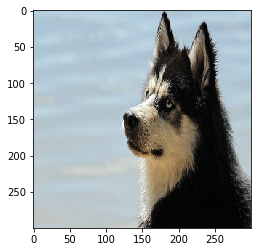

In [44]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('test7.jpg')
image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
new_img = cv2.resize(image,(300,300))
plt.imshow(new_img)  
new_img = np.expand_dims(new_img, axis=0)
classes = model.predict(new_img,batch_size=20)
print(classes[0])
if classes[0]>0.5:
    print("Image is a Dog")
else:
    print("Image is a Cat")

Text(0.5, 1.0, 'Training and validation loss')

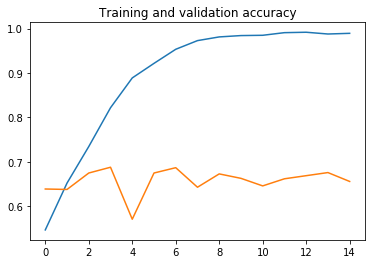

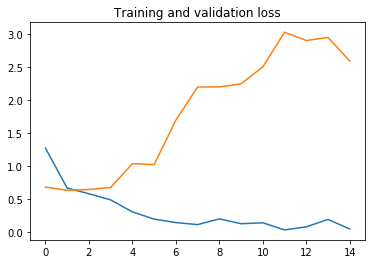

In [45]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'acc' ]
val_acc  = history.history[ 'val_acc' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )